# マルコフ決定過程の考え方を迷路問題を用いて確認する

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from google.colab import files
    print('Google Colab. 上での実行です')
    print('「ファイルを選択」から、notebook/commonフォルダのmeiro.pyを選択し、アップロードしてください')
    print('===========')
    files.upload()
    !mkdir common
    !mv *.py ./common
except:
    print('ローカル環境での実行です')


from common.meiro import State, Action, Environment

Google Colab. 上での実行です
「ファイルを選択」から、notebook/commonフォルダのmeiro.pyを選択し、アップロードしてください


Saving meiro.py to meiro.py


In [2]:
class Agent():
    """
    エージェントのクラス
    """
    def __init__(self, env):
        self.actions = env.actions

    def policy(self, state):
        """
        方策関数
        """
        # 仮のエージェントであるため、stateを使わずに
        # 次の行動を全くのランダムに選択する
        return np.random.choice(self.actions)

## 実行

In [3]:
# 迷路の条件を設定する
grid = np.array([
                            [0, 0, 0, 1],
                            [0, 9, 0, -1],
                            [0, 0, 0, 0]
                        ])

# 環境をつくる
env = Environment(grid, move_prob=0.95, agent_init_state=(0,0))

# エージェントをつくる
agent = Agent(env)

# エピソード回数を設定する
num_episode = 100

# 迷路ゲームを実行する
li_total_rewards = []
for e in range(num_episode):

    # エージェントの初期位置を決める
    state = env.reset()
    
    # 報酬の合計を初期化する
    total_reward = 0
    
    # エピソード終了フラグを初期化
    done = False

    while not done:
        """
        1エピソードのループ
        """
        # 次の行動を選択する
        action = agent.policy(state)
        
        # その行動を実際にとってみてみると、次の状態と獲得報酬額がわかる
        next_state, reward, done = env.step(action)
        
        # 報酬を積算する
        total_reward += reward
        
        # 状態を更新する
        state = next_state

    print("Episode {}: Agent gets {} reward.".format(e, total_reward))
    li_total_rewards.append(total_reward)

    


Episode 0: Agent gets 0.6000000000000001 reward.
Episode 1: Agent gets 0.07999999999999974 reward.
Episode 2: Agent gets -2.4800000000000004 reward.
Episode 3: Agent gets -2.7200000000000006 reward.
Episode 4: Agent gets 0.4 reward.
Episode 5: Agent gets 0.36 reward.
Episode 6: Agent gets 0.8 reward.
Episode 7: Agent gets 0.88 reward.
Episode 8: Agent gets -3.4400000000000013 reward.
Episode 9: Agent gets 0.72 reward.
Episode 10: Agent gets -1.0000000000000009 reward.
Episode 11: Agent gets 0.44000000000000006 reward.
Episode 12: Agent gets -3.040000000000001 reward.
Episode 13: Agent gets -1.44 reward.
Episode 14: Agent gets -2.8000000000000007 reward.
Episode 15: Agent gets -3.0800000000000027 reward.
Episode 16: Agent gets -1.6 reward.
Episode 17: Agent gets -2.0 reward.
Episode 18: Agent gets -2.8400000000000007 reward.
Episode 19: Agent gets -0.880000000000001 reward.
Episode 20: Agent gets -2.920000000000001 reward.
Episode 21: Agent gets 0.76 reward.
Episode 22: Agent gets -1.88

## 結果の可視化

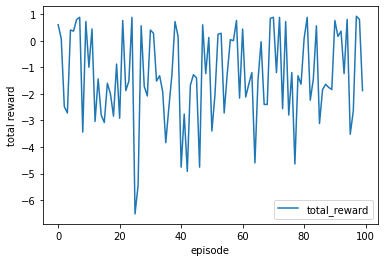

In [4]:
# グラフ
pd.DataFrame({"total_reward":li_total_rewards}).plot()
plt.ylabel("total reward")
plt.xlabel("episode")
plt.show()        

### [演習]
* 上記のコードには、方策関数を学習させる仕組みが入っていないため、エピソードをなんど繰り返しても報酬合計は大きくなりません
* 方策関数をかしこくするには、どのような考え方を導入すればいいでしょうか？ 